In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
data = pd.read_csv("preprocessed-data/krwkzt.csv")
data.rename(columns={'Date': 'ds', 'Close':'y'}, inplace=True)
data["ds"] = pd.to_datetime(data["ds"])
data

,ds,y
0,2004-01-02,0.115789
1,2004-01-05,0.114777
2,2004-01-06,0.115528
3,2004-01-07,0.114479
4,2004-01-08,0.115056
...,...,...
5949,2023-10-27,0.346066
5950,2023-10-28,0.346054
5951,2023-10-29,0.346054
5952,2023-10-30,0.349440


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
data[['y']] = scaler.fit_transform(data[['y']])
data

,ds,y
0,2004-01-02,0.047191
1,2004-01-05,0.044064
2,2004-01-06,0.046385
3,2004-01-07,0.043142
4,2004-01-08,0.044926
...,...,...
5949,2023-10-27,0.759132
5950,2023-10-28,0.759093
5951,2023-10-29,0.759093
5952,2023-10-30,0.769562


In [5]:
# context_length = 96
# for i in range(context_length):
#     data[f'y_lag_{i}'] = data['y'].shift(i)
# data = data.dropna()

In [6]:
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data.iloc[0:train_size], data.iloc[train_size:len(data)]
print(len(train), len(test))

4763 1191


In [7]:
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'], #['additive', 'multiplicative']
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5], #[0.01, 0.1, 0.5]
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0], #[1, 10, 30]
}


In [8]:
best_params = {}
best_score = float('inf')

In [9]:
for mode in param_grid['seasonality_mode']:
    for cps in param_grid['changepoint_prior_scale']:
        for sps in param_grid['seasonality_prior_scale']:
            # Create a model with the current hyperparameters
            model = Prophet(seasonality_mode=mode, 
                            changepoint_prior_scale=cps, 
                            seasonality_prior_scale=sps, 
                            )
            model.fit(train)

            # Evaluate the model using Mean Squared Error (MSE) and cross validation
            # df_cv = cross_validation(model, initial='4783 days', period='30 days', horizon='1 days')
            # score = mean_squared_error(df_cv['y'], df_cv['yhat'])
            future = model.make_future_dataframe(periods=train_size)
            forecast = model.predict(future)
            y_true = test['y'].values
            y_pred = forecast['yhat'].values[-len(test):]
            score = mean_squared_error(y_true, y_pred)
            print(mode, cps, sps, score)

            # Update best parameters
            if score < best_score:
                best_score = score
                best_params = {
                    'seasonality_mode': mode,
                    'changepoint_prior_scale': cps,
                    'seasonality_prior_scale': sps
                }

18:54:18 - cmdstanpy - INFO - Chain [1] start processing
18:54:18 - cmdstanpy - INFO - Chain [1] done processing
18:54:20 - cmdstanpy - INFO - Chain [1] start processing


additive 0.001 0.01 1.1621353797342724


18:54:20 - cmdstanpy - INFO - Chain [1] done processing
18:54:22 - cmdstanpy - INFO - Chain [1] start processing


additive 0.001 0.1 1.1654238660946579


18:54:22 - cmdstanpy - INFO - Chain [1] done processing
18:54:23 - cmdstanpy - INFO - Chain [1] start processing


additive 0.001 1.0 1.1329179316520022


18:54:24 - cmdstanpy - INFO - Chain [1] done processing
18:54:25 - cmdstanpy - INFO - Chain [1] start processing


additive 0.001 10.0 1.1735818269910252


18:54:26 - cmdstanpy - INFO - Chain [1] done processing
18:54:27 - cmdstanpy - INFO - Chain [1] start processing


additive 0.01 0.01 0.22380980014103832


18:54:28 - cmdstanpy - INFO - Chain [1] done processing
18:54:29 - cmdstanpy - INFO - Chain [1] start processing


additive 0.01 0.1 0.22480842595964726


18:54:30 - cmdstanpy - INFO - Chain [1] done processing
18:54:31 - cmdstanpy - INFO - Chain [1] start processing


additive 0.01 1.0 0.2098090523513434


18:54:31 - cmdstanpy - INFO - Chain [1] done processing
18:54:33 - cmdstanpy - INFO - Chain [1] start processing


additive 0.01 10.0 0.2632583792123261


18:54:35 - cmdstanpy - INFO - Chain [1] done processing
18:54:36 - cmdstanpy - INFO - Chain [1] start processing


additive 0.1 0.01 0.24702719882231067


18:54:38 - cmdstanpy - INFO - Chain [1] done processing
18:54:40 - cmdstanpy - INFO - Chain [1] start processing


additive 0.1 0.1 0.24570595484240973


18:54:41 - cmdstanpy - INFO - Chain [1] done processing
18:54:43 - cmdstanpy - INFO - Chain [1] start processing


additive 0.1 1.0 0.24379810859380868


18:54:44 - cmdstanpy - INFO - Chain [1] done processing
18:54:46 - cmdstanpy - INFO - Chain [1] start processing


additive 0.1 10.0 0.2455400351835737


18:54:47 - cmdstanpy - INFO - Chain [1] done processing
18:54:49 - cmdstanpy - INFO - Chain [1] start processing


additive 0.5 0.01 0.23818978243471817


18:54:51 - cmdstanpy - INFO - Chain [1] done processing
18:54:52 - cmdstanpy - INFO - Chain [1] start processing


additive 0.5 0.1 0.2353345324407488


18:54:53 - cmdstanpy - INFO - Chain [1] done processing
18:54:55 - cmdstanpy - INFO - Chain [1] start processing


additive 0.5 1.0 0.2354691697028496


18:54:56 - cmdstanpy - INFO - Chain [1] done processing
18:54:58 - cmdstanpy - INFO - Chain [1] start processing


additive 0.5 10.0 0.23596408199395796


18:54:58 - cmdstanpy - INFO - Chain [1] done processing
18:55:00 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.001 0.01 1.1389428465724933


18:55:00 - cmdstanpy - INFO - Chain [1] done processing
18:55:01 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.001 0.1 1.1257213597592406


18:55:02 - cmdstanpy - INFO - Chain [1] done processing
18:55:03 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.001 1.0 1.1524800579005832


18:55:03 - cmdstanpy - INFO - Chain [1] done processing
18:55:05 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.001 10.0 1.1557005688423374


18:55:05 - cmdstanpy - INFO - Chain [1] done processing
18:55:07 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.01 0.01 0.22247121802450112


18:55:07 - cmdstanpy - INFO - Chain [1] done processing
18:55:09 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.01 0.1 0.21876163989232594


18:55:09 - cmdstanpy - INFO - Chain [1] done processing
18:55:11 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.01 1.0 0.21415126720096486


18:55:12 - cmdstanpy - INFO - Chain [1] done processing
18:55:13 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.01 10.0 0.21532557017840132


18:55:15 - cmdstanpy - INFO - Chain [1] done processing
18:55:16 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.1 0.01 0.25331897655401137


18:55:19 - cmdstanpy - INFO - Chain [1] done processing
18:55:20 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.1 0.1 0.2563110844457406


18:55:21 - cmdstanpy - INFO - Chain [1] done processing
18:55:23 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.1 1.0 0.2542667290273498


18:55:24 - cmdstanpy - INFO - Chain [1] done processing
18:55:26 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.1 10.0 0.25470277433691524


18:55:27 - cmdstanpy - INFO - Chain [1] done processing
18:55:29 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.5 0.01 0.2448670980517995


18:55:30 - cmdstanpy - INFO - Chain [1] done processing
18:55:32 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.5 0.1 0.2437816506997981


18:55:33 - cmdstanpy - INFO - Chain [1] done processing
18:55:35 - cmdstanpy - INFO - Chain [1] start processing


multiplicative 0.5 1.0 0.24263184064941556


18:55:36 - cmdstanpy - INFO - Chain [1] done processing


multiplicative 0.5 10.0 0.24450757111638932


In [10]:
best_params

{'seasonality_mode': 'additive',
 'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 1.0}

In [11]:
model = Prophet(**best_params)
# for i in range(context_length):
#     model.add_regressor(f'y_lag_{i}')
model.fit(train)

18:56:40 - cmdstanpy - INFO - Chain [1] start processing
18:56:41 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# future = data.copy().drop('y', axis=1)
# future.reset_index(drop=True, inplace=True)
future = model.make_future_dataframe(periods=test_size+30)
forecast = model.predict(future)
forecast = forecast[['ds', 'yhat']]
forecast

,ds,yhat
0,2004-01-02,0.049412
1,2004-01-05,0.050016
2,2004-01-06,0.050805
3,2004-01-07,0.051250
4,2004-01-08,0.051304
...,...,...
5979,2023-11-26,0.895413
5980,2023-11-27,0.896374
5981,2023-11-28,0.897021
5982,2023-11-29,0.897360


In [13]:
forecast[['yhat']] = scaler.inverse_transform(forecast[['yhat']])
data[['y']] = scaler.inverse_transform(data[['y']])


In [14]:
# y_true = test['y'].values
# y_pred = forecast['yhat'].values[-len(test):]

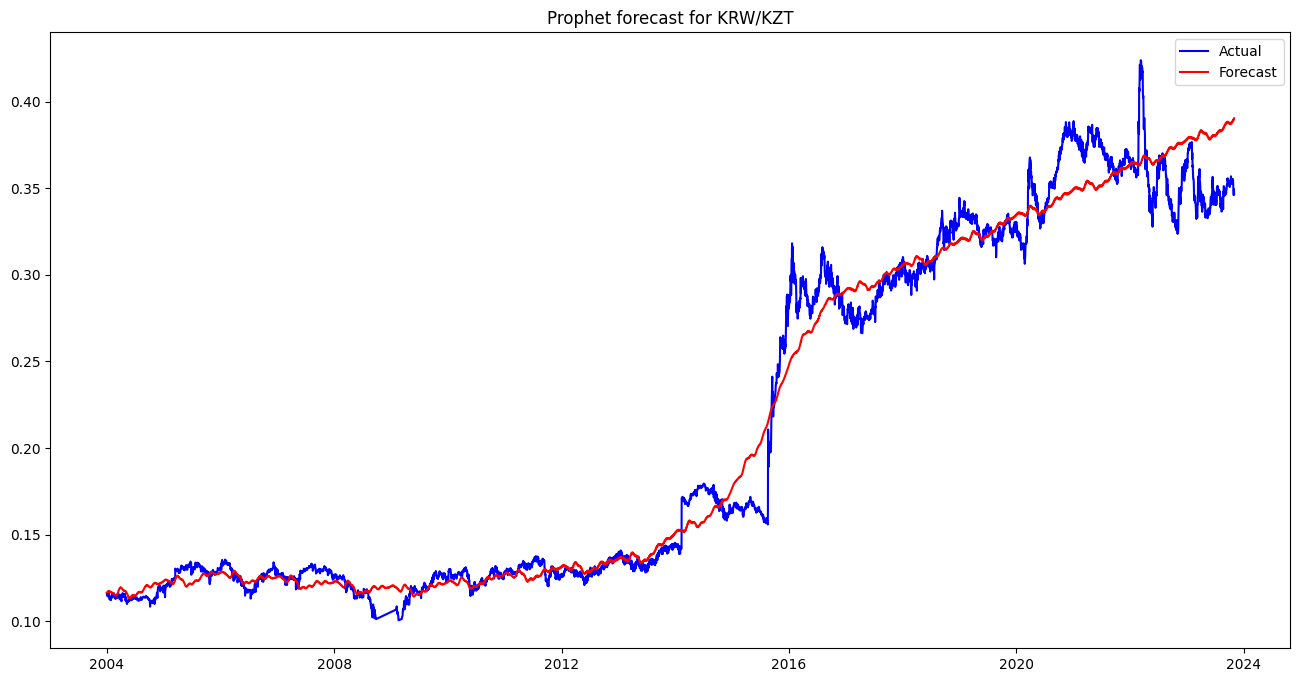

In [15]:
plt.figure(figsize=(16,8))
plt.plot(data['ds'], data['y'], label='Actual', color='blue')
plt.title(f"Prophet forecast for KRW/KZT")
plt.plot(forecast['ds'][:len(data)], forecast['yhat'][:len(data)], label='Forecast', color='red')
plt.legend()
plt.savefig('./plots/prophet_krwkzt_train_val')
plt.show()

In [16]:
test_df = pd.read_csv("./krwkzt-test.csv")
test_df["Close"] = test_df.Close.map(lambda x: np.float32(x.replace(",", ".")))
test_df["Date"] = test_df.Date.map(lambda x: pd.to_datetime(x, dayfirst=True).date())
test_df.rename(columns={'Date': 'ds', 'Close':'y'}, inplace=True)
test_df.head()

,ds,y
0,2023-11-01,0.348330
1,2023-11-02,0.349403
2,2023-11-03,0.352313
3,2023-11-04,0.352271
4,2023-11-05,0.352271


In [17]:
testY = test_df.y.values
testPred = forecast[-30:].yhat.values
# testPred
testScore = mean_squared_error(testY, testPred)
testScore

0.0013410534607858045

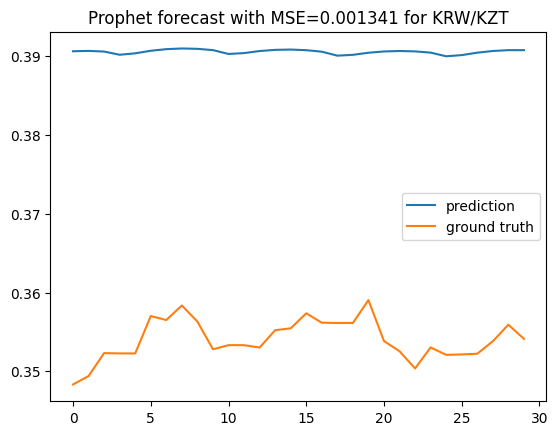

In [18]:
plt.plot(testPred, label='prediction')
plt.plot(testY, label='ground truth')
plt.title(f"Prophet forecast with MSE={testScore:.6f} for KRW/KZT")
plt.legend()
plt.savefig('./plots/prophet_krwkzt_test')
plt.show()

Best params for KRW/VND: {'seasonality_mode': 'additive',
 'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 0.01}

Best params for KRW/KZT: {'seasonality_mode': 'additive',
 'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 1.0}